# Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected toscore based upon the number of hours they studied. This is a simple linear regression task as itinvolves just two variables. Data can be found at http://bit.ly/w-data
What will be predicted score if a student study for 9.25 hrs in a day?

In [1]:
###IMPORTING ALL LIBRARIES
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
print('Successfully imported...')

Successfully imported...


In [2]:
###READ THE DATA
link = "http://bit.ly/w-data"
data = pd.read_csv(link)
print('Data imported successfully...')

Data imported successfully...


In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Plot the datapoints

Plot the datapoints on 2-d graph to see if we can manually find any relationship between the data 

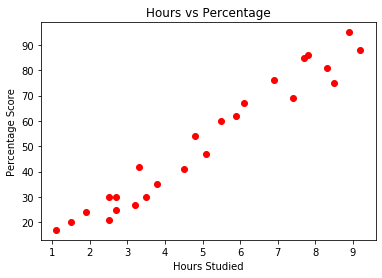

In [5]:
# Plotting the distribution of scores
plt.plot(data['Hours'],data['Scores'],'ro')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph, we can clearly see that there is positive linear relation between no. of hours studied and percentage scored

# Preparing the data

In [6]:
###divide the data into input and output
X=data['Hours'].values
X=X.reshape(-1,1)
Y=data['Scores'].values

In [7]:
# split the data into training and testing data
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.2) 

# Training the algorithm

In [8]:
from sklearn.linear_model import LinearRegression
alg=LinearRegression()
alg.fit(x_train,y_train)
print('Training complete...')

Training complete...


Plot the line

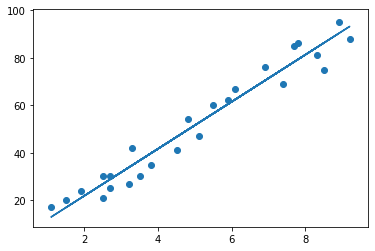

In [9]:
#y=m*x+c
c=alg.intercept_
m=alg.coef_
plt.plot(X,m*X+c,)
plt.scatter(X,Y)
plt.show()

# Score

In [10]:
alg.score(x_train,y_train),alg.score(x_test,y_test)

(0.9515510725211553, 0.9454906892105354)

# Making Predictions

In [11]:
y_pred=alg.predict(x_test)

In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Calculate error

In [13]:
from sklearn import metrics  
print('Mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean square error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean absolute error: 4.183859899002982
Mean squared error: 21.598769307217456
Root Mean square error: 4.647447612100373


# Test your own data

In [14]:
x=float(input('Enter no. of hours studied:'))
v=np.array([x]).reshape(-1,1)
print('percentage scored:',alg.predict(v)[0])

Enter no. of hours studied:9.25
percentage scored: 93.69173248737539


# Result

If a student study for 9.25 hours a day, he/she will score 93.69% according to this model